Markov Transition Field

In [1]:
#!pip install pyts

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


In [3]:
filename = '/Users/palhares/Documents/msc/PTT-PPG-PhysioNet/physionet.org/files/pulse-transit-time-ppg/1.1.0/csv/s2_sit.csv'
df = pd.read_csv(filename)

In [4]:
df

,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,2021-01-01 15:14:41.324938,31256,0,75338,75758,4866,82950,92726,4332,6320680,5731813,37.31,39.50,36.224487,8.602206,-3.817749,-2.365592,-0.005860,-0.001790,-0.004309
1,2021-01-01 15:14:41.326938,31204,0,75338,75758,4866,82954,92746,4337,6320680,5731813,37.31,39.50,36.224487,8.590235,-3.812362,-2.371578,-0.006127,-0.001790,-0.002844
2,2021-01-01 15:14:41.328938,31199,0,75343,75769,4872,82974,92753,4332,6325330,5738633,37.31,39.50,36.218498,8.586643,-3.818946,-2.388937,-0.005994,-0.001790,-0.001646
3,2021-01-01 15:14:41.330938,31243,0,75348,75763,4871,82974,92753,4332,6325330,5738633,37.31,39.50,36.218498,8.576468,-3.829122,-2.400908,-0.005461,-0.002322,0.000218
4,2021-01-01 15:14:41.332938,31245,0,75352,75766,4883,82973,92761,4340,6325330,5738633,37.31,39.50,36.221493,8.571679,-3.829122,-2.419464,-0.005727,-0.003521,0.002482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246201,2021-01-01 15:22:53.726941,29059,0,74529,74869,4466,82611,91871,4063,6568472,5870981,38.31,40.69,38.273190,8.478300,-4.144574,-2.299149,-0.005860,-0.000059,0.009140
246202,2021-01-01 15:22:53.728941,31036,0,74529,74869,4466,82605,91874,4067,6568472,5870981,38.31,40.69,38.276184,8.467525,-4.134997,-2.308727,-0.001466,-0.001390,0.013002
246203,2021-01-01 15:22:53.730941,34134,0,74535,74862,4467,82608,91860,4069,6568472,5870981,38.31,40.69,38.276184,8.450766,-4.127215,-2.325487,0.003061,-0.003121,0.016730
246204,2021-01-01 15:22:53.732941,38385,0,74529,74874,4467,82595,91869,4062,6568472,5870981,38.31,40.69,38.279182,8.447773,-4.118237,-2.337459,0.005725,-0.004453,0.020059


In [18]:
column_name = 'pleth_1'
max_rows = 1000
X = df[column_name].values[:max_rows].reshape(1, -1)  # Transforma em um array 2D

In [19]:
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

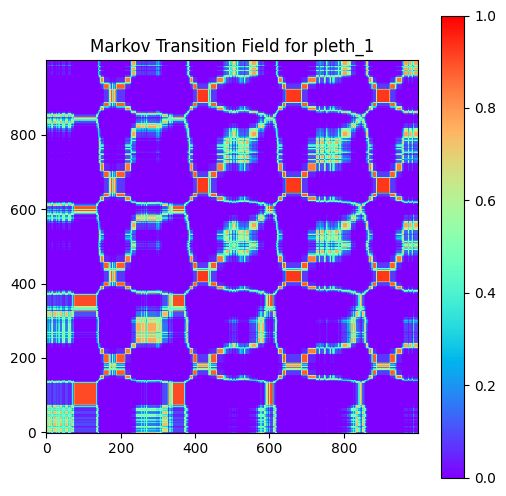

In [20]:
plt.figure(figsize=(6, 6))
plt.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.)
plt.title('Markov Transition Field for {}'.format(column_name))
plt.colorbar()
plt.show()

In [21]:
column_name = 'pleth_2'
max_rows = 1000
X = df[column_name].values[:max_rows].reshape(1, -1)  # Transforma em um array 2D

In [22]:
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

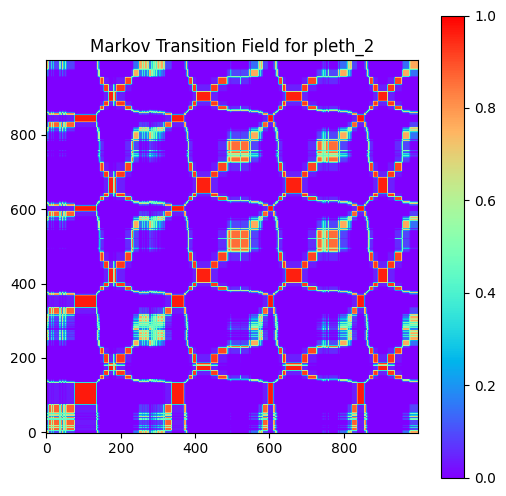

In [23]:
plt.figure(figsize=(6, 6))
plt.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.)
plt.title('Markov Transition Field for {}'.format(column_name))
plt.colorbar()
plt.show()

In [24]:
pleth_columns = [col for col in df.columns if col.startswith('pleth_')]

In [26]:
max_rows = 1000
mtfs = []

In [27]:
for column_name in pleth_columns:
    X = df[column_name].values[:max_rows].reshape(1, -1)
    mtf = MarkovTransitionField(n_bins=8)
    X_mtf = mtf.fit_transform(X)
    mtfs.append(X_mtf[0])

In [28]:
num_columns = len(pleth_columns)

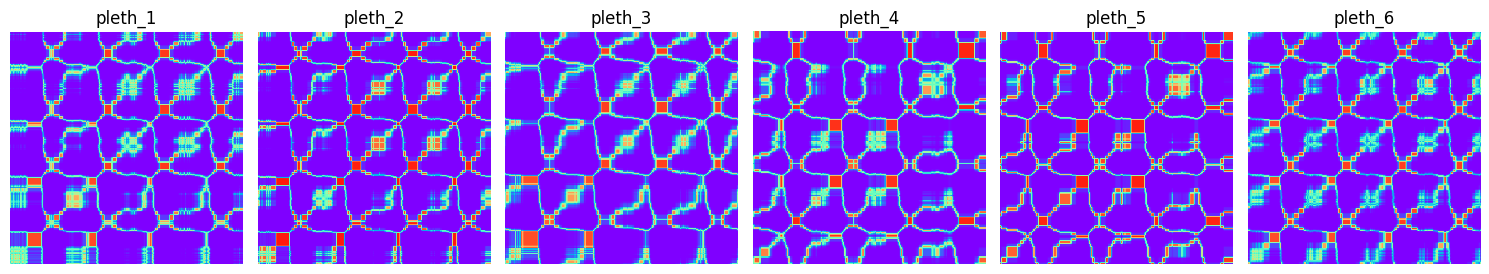

In [32]:
fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(mtfs[i], cmap='rainbow', origin='lower', vmin=0., vmax=1.)
    ax.set_title(pleth_columns[i])
    ax.axis('off')
    
plt.tight_layout()
plt.show()